In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
import torch.nn as nn
import torch.optim as optim

In [2]:
n_iter = 50
n_sim  = 200
alpha = 0.1
m_w = 30
N = 10
p_straggler_list = [0.3,0.5,0.8]

prfs_comm = [(0.3/4,4),(0.3/3,3),(0.3/2,2), (0.3,1)]
prfs_data = [(0.3,7),(0.3,5),(0.3,2), (0.3,1)]

In [3]:

accuracies_iid = np.load("accuracies_iid.npy")
accuracies_noniid = np.load("accuracies_noniid.npy")
accuracies_comm = np.load("accuracies_comm.npy")
accuracies_data = np.load("accuracies_data.npy")

moments_iid = np.load("moments_iid.npy")
moments_noniid = np.load("moments_noniid.npy")
moments_comm = np.load("moments_comm.npy")
moments_data = np.load("moments_data.npy")


In [6]:

accuraciesHom_iid = np.load("accuracies_iid.npy")
accuraciesHom_noniid = np.load("accuraciesHom_noniid.npy")
accuraciesHom_comm = np.load("accuraciesHom_comm.npy")
accuraciesHom_data = np.load("accuraciesHom_data.npy")

momentsHom_iid = np.load("moments_iid.npy")
momentsHom_noniid = np.load("momentsHom_noniid.npy")
momentsHom_comm = np.load("momentsHom_comm.npy")
momentsHom_data = np.load("momentsHom_data.npy")


accuraciesHom_data_strag = np.load("accuraciesHom_data_strag.npy")


In [14]:
def plot_accuracies(accuracies, accuracies_iid, accuracies_noniid, prfs):
    for i_prf, prf in enumerate(prfs):
            plt.plot( [i for i in range(int(n_iter))], np.mean(accuracies[i_prf],axis=0))
    plt.plot( [i for i in range(int(n_iter))], np.mean(accuracies_noniid,axis=0))
    plt.plot( [i for i in range(int(n_iter))], np.mean(accuracies_iid,axis=0))
    legends = ["{n1}% nonprivate data, {n2} replication".format(n1 = p*100, n2 = rf) for (p,rf) in prfs]
    legends.append("No data sharing")
    legends.append("iid data")
    plt.legend(legends)
    plt.xlabel("Iteration")
    plt.ylabel("Accuracy")



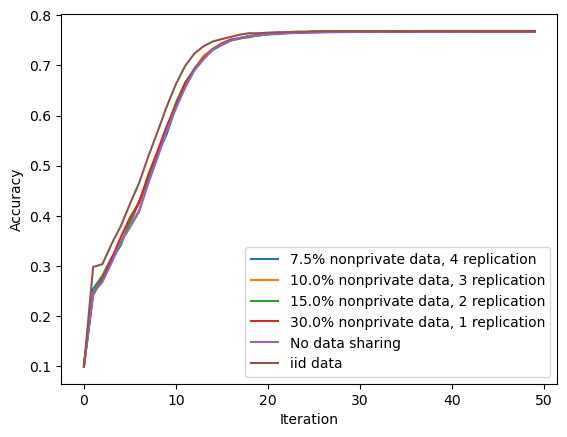

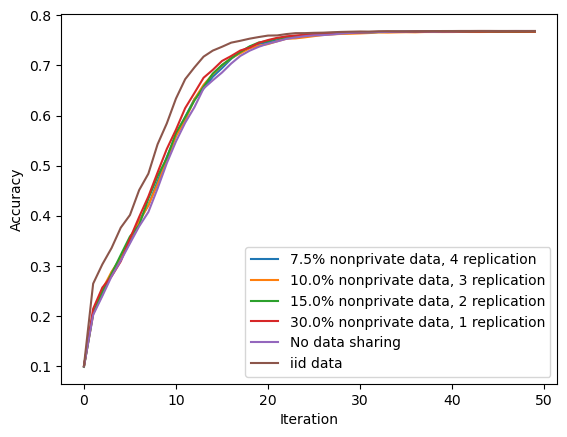

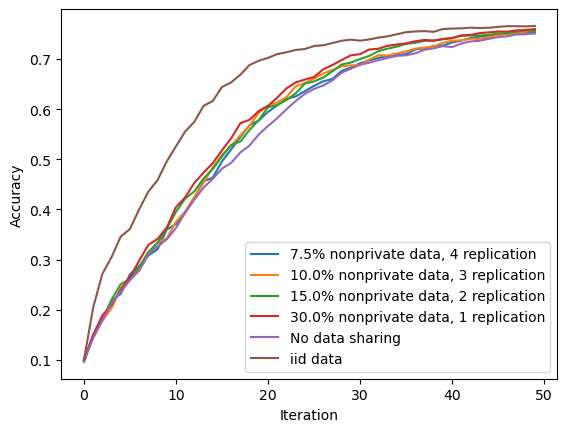

In [15]:
for i_str, p_straggler in enumerate(p_straggler_list):
    plt.figure(i_str)
    plot_accuracies(accuracies_comm[:,i_str],accuracies_iid[i_str],accuracies_noniid[i_str],prfs_comm)
    plt.savefig("accuracies_comm{xx}.png".format(xx=i_str))

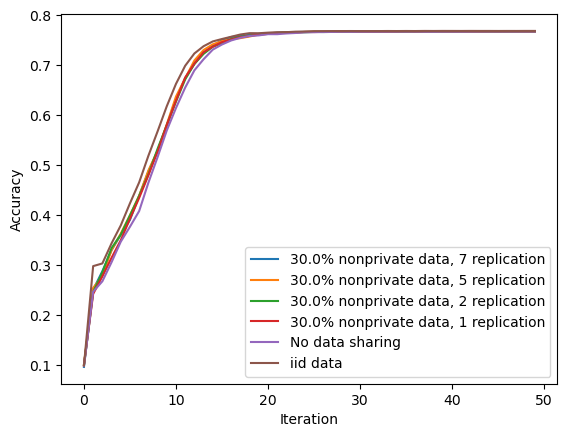

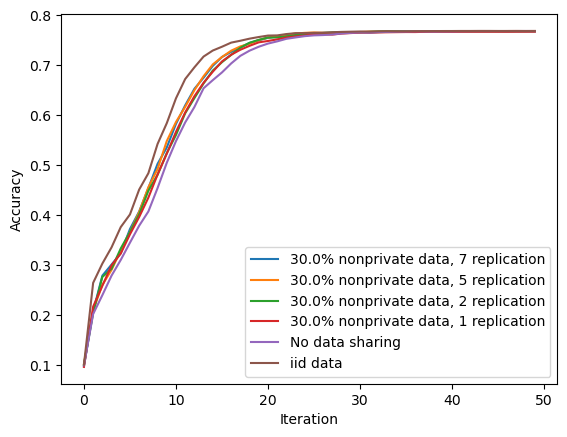

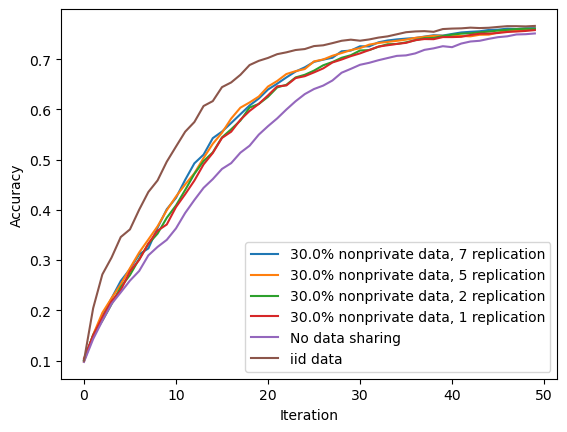

In [16]:
for i_str, p_straggler in enumerate(p_straggler_list):
    plt.figure(i_str)
    plot_accuracies(accuracies_data[:,i_str],accuracies_iid[i_str],accuracies_noniid[i_str],prfs_data)
    plt.savefig("accuracies_data{xx}.png".format(xx=i_str))

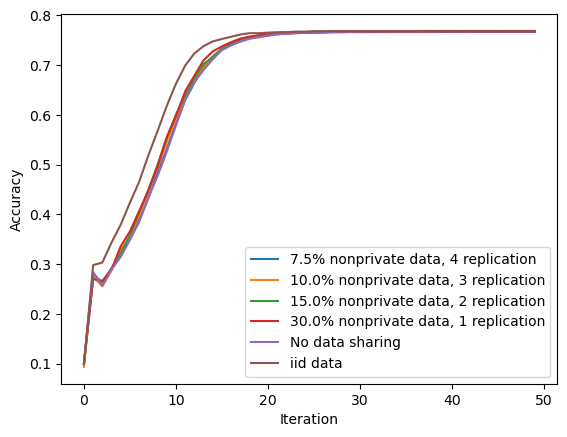

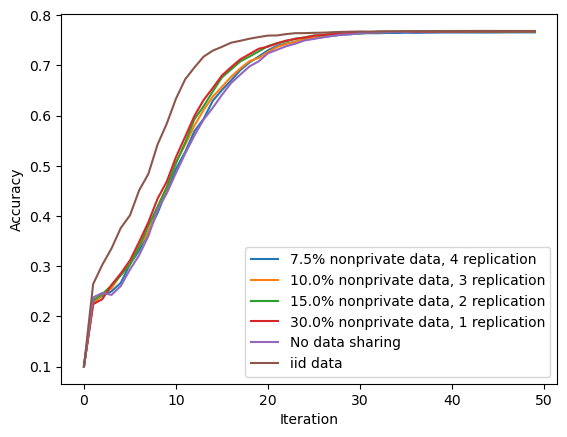

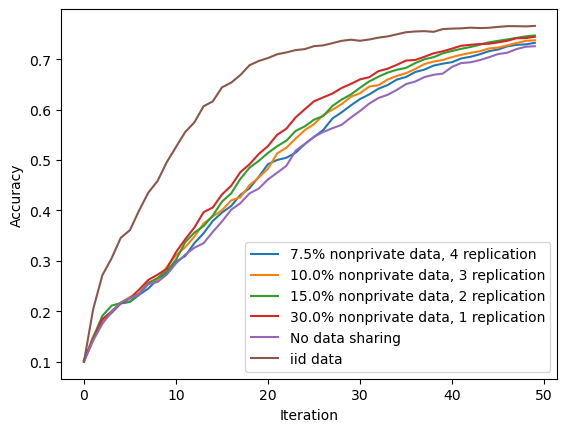

In [17]:
for i_str, p_straggler in enumerate(p_straggler_list):
    plt.figure(i_str)
    plot_accuracies(accuraciesHom_comm[:,i_str],accuracies_iid[i_str],accuraciesHom_noniid[i_str],prfs_comm)
    plt.savefig("accuraciesHom_comm{xx}.png".format(xx=i_str))

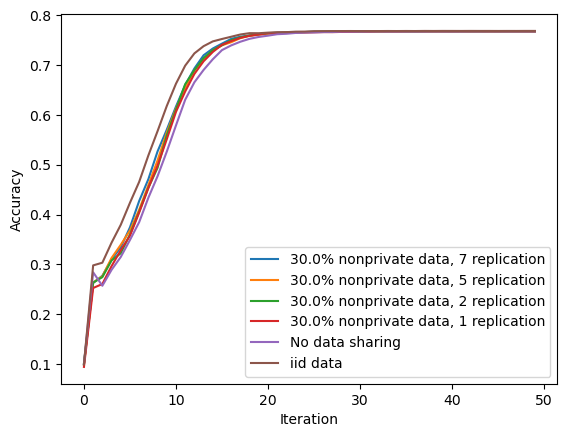

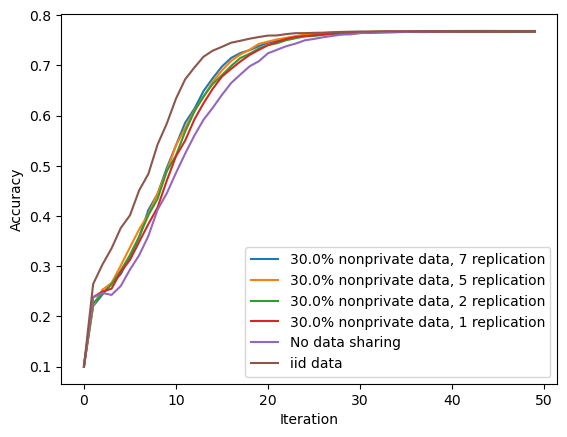

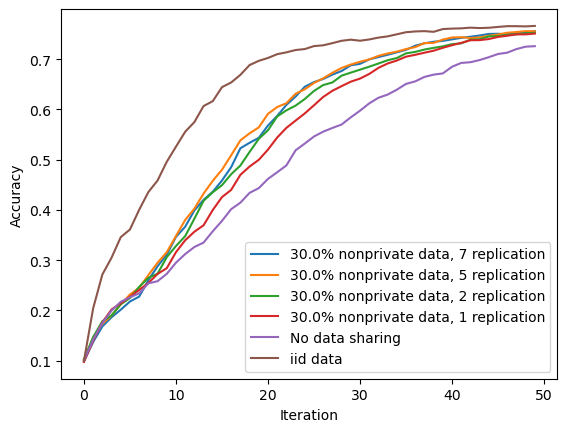

In [18]:
for i_str, p_straggler in enumerate(p_straggler_list):
    plt.figure(i_str)
    plot_accuracies(accuraciesHom_data[:,i_str],accuracies_iid[i_str],accuraciesHom_noniid[i_str],prfs_data)
    plt.savefig("accuraciesHom_data{xx}.png".format(xx=i_str))

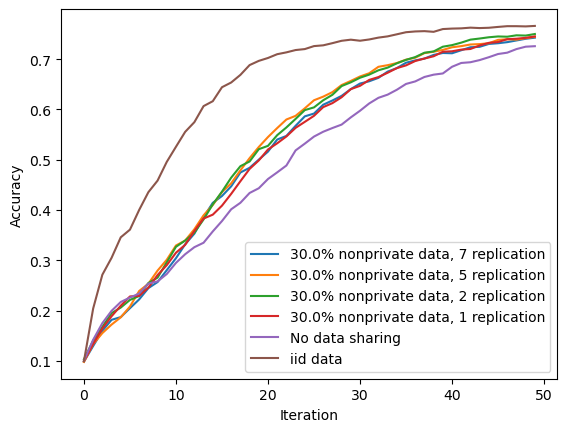

In [19]:
plot_accuracies(accuraciesHom_data_strag[:],accuracies_iid[2],accuraciesHom_noniid[2],prfs_data)
plt.savefig("accuraciesHom_data_strag{xx}.png".format(xx=i_str))